# **PLOTS**
<hr>

## **Authors:**
- **Ladrera**, Raiken Lee
- **Tibon**, Hestia  

<hr>


In [25]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## **Bar Graph Plot**
<hr>

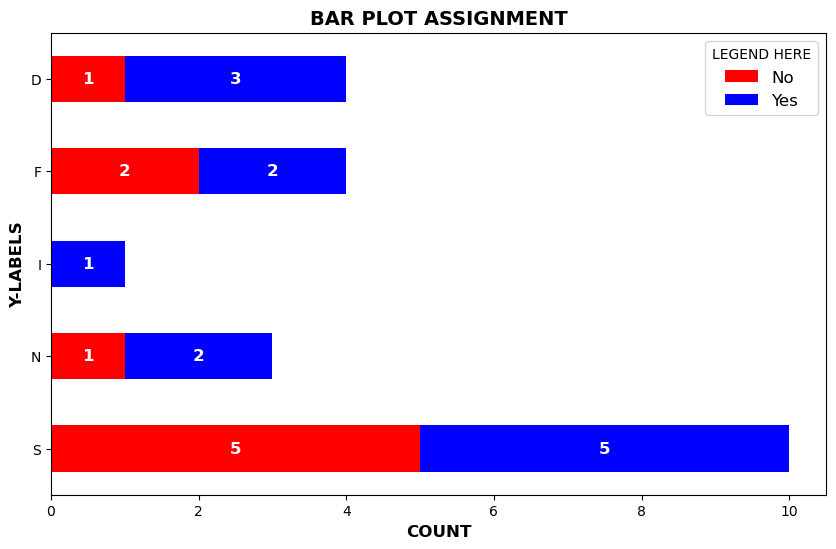

In [26]:
# Load the CSV file
bar_df = pd.read_csv("bar_assignment.csv")

# Transform 1 into "Yes" and 0 into "No"
bar_df["COUNT"] = bar_df["COUNT"].map({1: "Yes", 0: "No"})

# Pivot the data to get a stacked structure
bar_counts = bar_df.groupby(["LABEL", "COUNT"]).size().unstack(fill_value=0)

# Sort labels for consistency
bar_counts = bar_counts.sort_index(ascending=False)

# Define colors
colors = ["red", "blue"]

# Create horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_counts.plot(kind="barh", stacked=True, ax=ax, color=colors)

# Add labels to bars
for container in ax.containers:
    labels = [int(v) if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=12, color="white", fontweight="bold")

ax.set_title("BAR PLOT ASSIGNMENT", fontsize=14, fontweight="bold")
ax.set_xlabel("COUNT", fontsize=12, fontweight="bold")
ax.set_ylabel("Y-LABELS", fontsize=12, fontweight="bold")
ax.legend(title="LEGEND HERE", labels=["No", "Yes"], loc="upper right", fontsize=12)

# Display the plot
plt.show()


## **Sankey Diagram Plot**
<hr>

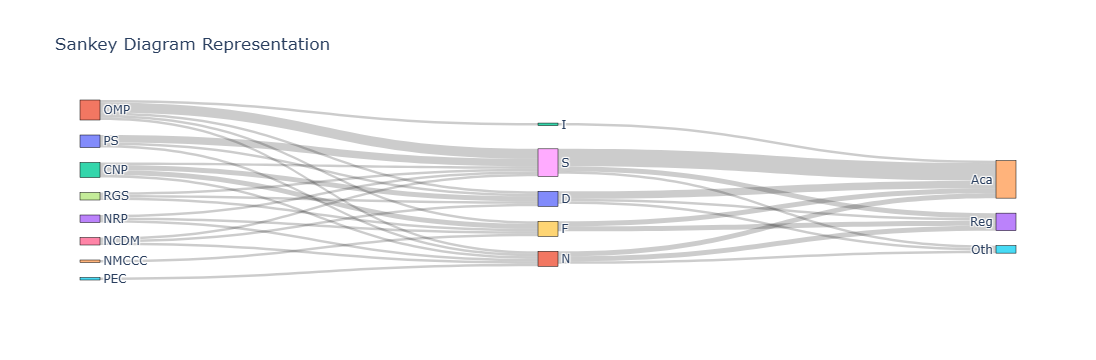

In [27]:
# Load the CSV file
sankey_df = pd.read_csv("sankey_assignment.csv")

# Define the source and target groups
source_columns = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
middle_labels = sankey_df["LABEL"].tolist()
target_columns = ['Reg', 'Aca', 'Oth']

# Create node labels
all_labels = source_columns + middle_labels + target_columns

# Create mapping from label to index
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

# Initialize source, target, and value lists
source = []
target = []
value = []

# Connecting source columns to middle labels
for col in source_columns:
    for i, label in enumerate(middle_labels):
        source.append(label_to_index[col])   # From Source Nodes
        target.append(label_to_index[label]) # To Middle Nodes
        value.append(sankey_df[col][i])      # Flow value

# Connecting middle labels to target columns
for col in target_columns:
    for i, label in enumerate(middle_labels):
        source.append(label_to_index[label]) # From Middle Nodes
        target.append(label_to_index[col])   # To Target Nodes
        value.append(sankey_df[col][i])      # Flow value

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
))

# Update title and layout
fig.update_layout(title_text="SANKEY DIAGRAM ASSIGNMENT", font_size=12)
fig.show()

## **Network Graph**
<hr>

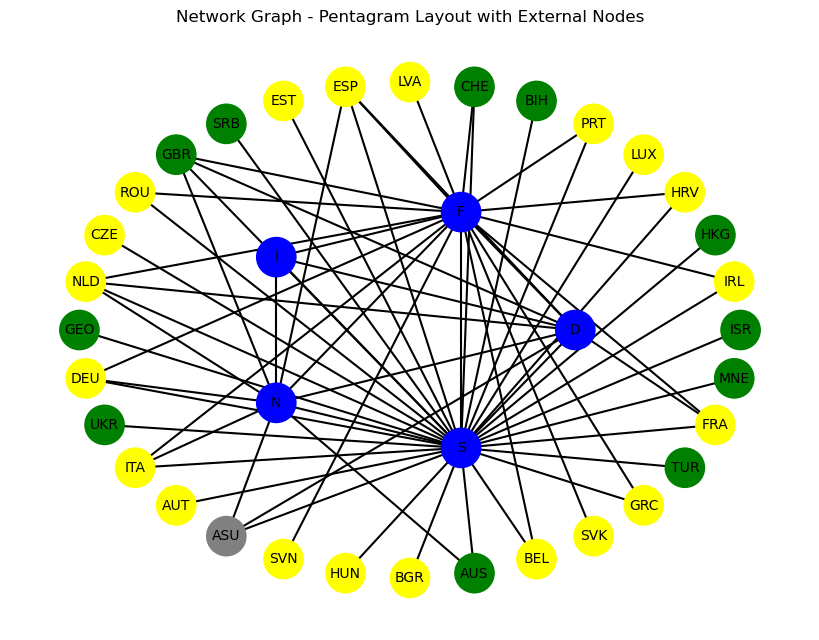

In [28]:
# Load the CSV file
net_df = pd.read_csv("networks_assignment.csv")

# Create Graph
G = nx.Graph()

# Define the node categories
pentagram_nodes = ['D', 'F', 'I', 'N', 'S']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 
                'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']

# Identify all nodes in the dataset
dataset_nodes = set(net_df["LABELS"]).union(set(net_df.columns[1:]))  # Nodes from labels & columns

# Add all nodes from the dataset
G.add_nodes_from(dataset_nodes)

# Add edges from the dataset
for _, row in net_df.iterrows():
    node = row['LABELS']
    for target, value in row[1:].items():
        if value > 0:
            G.add_edge(node, target, weight=value)

# Define positions for pentagram nodes
angle = np.linspace(0, 2 * np.pi, len(pentagram_nodes), endpoint=False)
pos = {node: (np.cos(a), np.sin(a)) for node, a in zip(pentagram_nodes, angle)}

# Define positions for external nodes
outer_radius = 2
remaining_nodes = dataset_nodes - set(pentagram_nodes)  # Nodes not in the pentagram
outer_angle = np.linspace(0, 2 * np.pi, len(remaining_nodes), endpoint=False)
pos.update({node: (outer_radius * np.cos(a), outer_radius * np.sin(a)) for node, a in zip(remaining_nodes, outer_angle)})

# Assign colors to nodes with a fallback default
color_map = {node: 'blue' for node in pentagram_nodes}
color_map.update({node: 'yellow' for node in yellow_nodes})
color_map.update({node: 'green' for node in green_nodes})
node_colors = [color_map.get(node, "gray") for node in G.nodes()]  # Default to gray for missing nodes

# Draw the network graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=10, edge_color="black", width=1.5)
plt.title("NETWORK GRAPH ASSIGNMENT")
plt.show()